In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import owlready2 as owl
from owlready2 import *
owlready2.reasoning.JAVA_MEMORY = 200000

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation




In [2]:
torch.manual_seed(269)

In [3]:
from create_pytorch_dataset import GeometricInterpretation, SCALE_FACTOR
from create_pytorch_dataset import entity_to_idx_vocab, concept_to_idx_vocab, role_to_idx_vocab, idx_to_entity_vocab, idx_to_concept_vocab, idx_to_role_vocab
from create_pytorch_dataset import trainConceptDataset, testConceptDataset, trainRoleDataset, testRoleDataset, train_ConceptDataLoader, test_ConceptDataLoader, train_RoleDataLoader, test_RoleDataLoader


All Concept Names and Concept Intersections have been preprocessed for the creation of the canonical model.

All restrictions have been preprocessed for the creation of the canonical model.
Starting to reason.



* Owlready2 * Running HermiT...
    java -Xmx200000M -cp /opt/homebrew/Caskroom/miniforge/base/envs/kgenv/lib/python3.11/site-packages/owlready2/hermit:/opt/homebrew/Caskroom/miniforge/base/envs/kgenv/lib/python3.11/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/wg/g5861gcs6k5d3rbq_rncztjw0000gn/T/tmpjxs7k9o1



Done reasoning. Creating the canonical model.

Concluded creating canonical model.
================EMBEDDING DIMENSION================
Concept Name dimensions: 9
The number of role names is: 5
The size of the domain is: 90
Role names dimensions: 450

Final embedding dimension: 459
The final dimension for role regions is: 918

===============FINISHED EMBEDDINGS===============
There are 90 vector embeddings.

============FINISHED INTERPS CONCEPT=============
There are 9 regions for concept names.

=============FINISHED INTERPS ROLES==============
There are 5 regions for role names.



* Owlready2 * HermiT took 0.4669828414916992 seconds
* Owlready * Reparenting entity.Q16019673: {owl.Thing} => {Class.Father}
* Owlready * Reparenting entity.Q2397531: {owl.Thing} => {Class.Child, Class.Father}
* Owlready * Reparenting entity.Q57209: {owl.Thing} => {Class.Sibling}
* Owlready * Reparenting entity.Q829669: {owl.Thing} => {Class.Child}
* Owlready * Reparenting entity.Q11090991: {owl.Thing} => {Class.Sibling}
* Owlready * Reparenting entity.Q10323203: {owl.Thing} => {Class.Sibling}
* Owlready * Reparenting entity.Q2840038: {owl.Thing} => {Class.Child}
* Owlready * Reparenting entity.Q60610: {owl.Thing} => {Class.Child}
* Owlready * Reparenting entity.Q213716: {owl.Thing} => {Class.Sibling}
* Owlready * Reparenting entity.Q312110: {owl.Thing} => {Class.Father, Class.Child, Class.Sibling, Class.Spouse}
* Owlready * Reparenting entity.Q22876077: {owl.Thing} => {Class.Child}
* Owlready * Reparenting entity.Q2446902: {owl.Thing} => {Class.Child, Class.Father}
* Owlready * Repar

In [4]:
from FaithEL_model import FaithEL
from utils import save_model, train_model, plot_score_hak

In [5]:
CENTROID_SCORE = True # When set to True, model scores assertion w.r.t distance to the centroid and to the moving parameter for concepts/roles
LR = 0.001
PHI = 1 # Weighs how far the concept parameter is allowed to move
GAMMA = 1 # Weighs how far the individual parameter is allowed to move
RADIUS = SCALE_FACTOR/2 + 0.1
EMB_DIM = 459

LOG_EPOCH = 10
EVAL_TRAIN = True
EPOCHS = 250
EVAL_FREQ = 25

NEG_SAMPLING = True
PLOT_LOSS = True

DIM1 = 0
DIM2 = 1

loss_fn = nn.MSELoss()

In [6]:
torch.manual_seed(269)

model = FaithEL(EMB_DIM, PHI, RADIUS, GAMMA,
                entity_to_idx_vocab, concept_to_idx_vocab, role_to_idx_vocab,
                )

optimizer = optim.Adam(model.parameters(), lr=LR)

In [7]:
model_list = []

Epoch 10/250 -> Train Loss: -235.9007 | Test Loss: -304.6172

Epoch 20/250 -> Train Loss: -262.2444 | Test Loss: -338.5792

Epoch 25: Initiating evaluation. 

Epoch 30/250 -> Train Loss: -290.1176 | Test Loss: -372.0677

Epoch 40/250 -> Train Loss: -317.7473 | Test Loss: -408.0793

Epoch 50/250 -> Train Loss: -345.3476 | Test Loss: -442.1888

Epoch 50: Initiating evaluation. 

Epoch 60/250 -> Train Loss: -373.8161 | Test Loss: -477.1664

Epoch 70/250 -> Train Loss: -402.9040 | Test Loss: -513.9459

Epoch 75: Initiating evaluation. 

Epoch 80/250 -> Train Loss: -431.7193 | Test Loss: -550.5123

Epoch 90/250 -> Train Loss: -461.6369 | Test Loss: -585.0769

Epoch 100/250 -> Train Loss: -490.1316 | Test Loss: -622.5107

Epoch 100: Initiating evaluation. 

Epoch 110/250 -> Train Loss: -520.7096 | Test Loss: -659.8581

Epoch 120/250 -> Train Loss: -549.8554 | Test Loss: -695.6709

Epoch 125: Initiating evaluation. 

Epoch 130/250 -> Train Loss: -579.4630 | Test Loss: -733.5488

Epoch 140/250

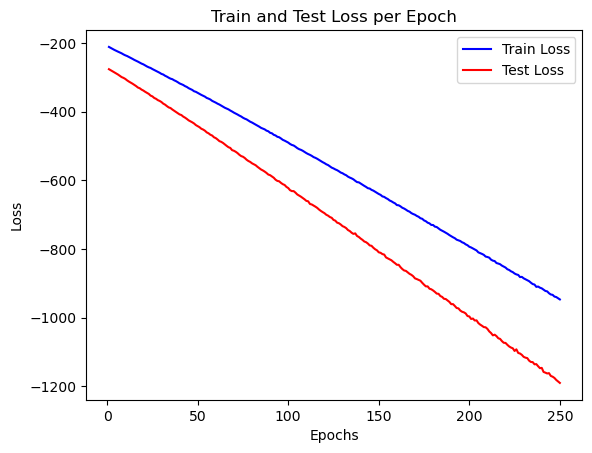

In [8]:
train_loss_list, test_loss_list, train_hits_at_k_concept, test_hits_at_k_concept, train_hits_at_k_role, test_hits_at_k_role, = train_model(model, GeometricInterpretation,
                                                                                                                                           train_ConceptDataLoader, train_RoleDataLoader, test_ConceptDataLoader, test_RoleDataLoader,
                                                                                                                                           trainConceptDataset, testConceptDataset, trainRoleDataset, testRoleDataset,
                                                                                                                                           EPOCHS, LOG_EPOCH, EVAL_FREQ, EVAL_TRAIN, loss_fn, optimizer,
                                                                                                                                           idx_to_entity_vocab, entity_to_idx_vocab,
                                                                                                                                           idx_to_concept_vocab, concept_to_idx_vocab,
                                                                                                                                           idx_to_role_vocab, role_to_idx_vocab,
                                                                                                                                           CENTROID_SCORE, NEG_SAMPLING, PLOT_LOSS
                                                                                                                                           )

model_list.append(save_model(CENTROID_SCORE, LR, PHI, GAMMA, EMB_DIM, EPOCHS, LOG_EPOCH, EVAL_FREQ, EVAL_TRAIN,
                             loss_fn, model, optimizer, train_loss_list, test_loss_list, train_hits_at_k_concept, test_hits_at_k_concept, train_hits_at_k_role, test_hits_at_k_role))

In [15]:
pos_list = -1
TOPK = 2

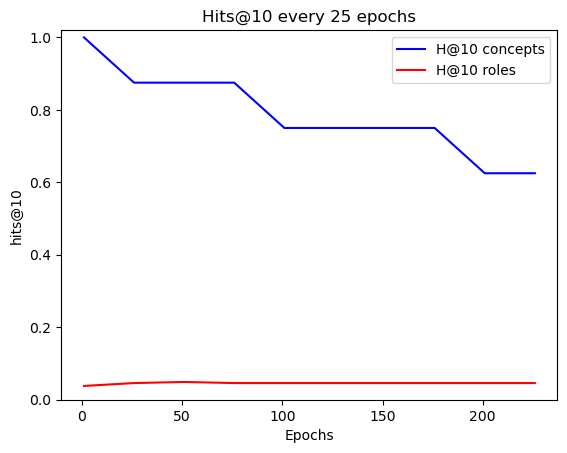

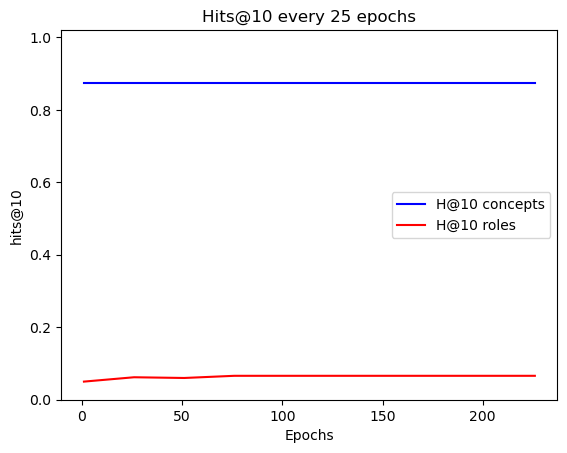

In [16]:
plot_score_hak(model_list[pos_list]['test_hits_at_k_concept'], model_list[pos_list]['test_hits_at_k_role'], TOPK, model_list[pos_list]['epochs'], model_list[pos_list]['eval_freq'])
plot_score_hak(model_list[pos_list]['train_hits_at_k_concept'], model_list[pos_list]['train_hits_at_k_role'], TOPK, model_list[pos_list]['epochs'], model_list[pos_list]['eval_freq'])